<a href="https://colab.research.google.com/github/mtxslv/DStask/blob/master/DeepLearningComputerVisionTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Brainstorming...*
Ok,ok... my task is: find out if a given image is rotated. If yes, fix it! Apparently, [there is an way of rotating easily](https://docs.fast.ai/vision.transform.html).

We need to understand how to [correct the image orientation](https://d4nst.github.io/2017/01/12/image-orientation/). But first, [how can we upload our dataset to Google Colab](https://medium.com/@yuraist/how-to-upload-your-own-dataset-into-google-colab-e228727c87e9)? Well... [let's do it directly from Dropbox](https://www.freecodecamp.org/news/how-to-transfer-large-files-to-google-colab-and-remote-jupyter-notebooks-26ca252892fa/)!

## *Uploading material..*
The very first thing needed is: uploading the datasets. Let's do it!

In [1]:
!git clone https://github.com/thatbrguy/Dropbox-Uploader.git
!cd Dropbox-Uploader

Cloning into 'Dropbox-Uploader'...
remote: Enumerating objects: 951, done.
remote: Total 951 (delta 0), reused 0 (delta 0), pack-reused 951
Receiving objects: 100% (951/951), 327.52 KiB | 14.89 MiB/s, done.
Resolving deltas: 100% (504/504), done.


In [2]:
!cd /Dropbox-Uploader/

/bin/bash: line 0: cd: /Dropbox-Uploader/: No such file or directory


In [3]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 Jun 30 16:27 .
drwxr-xr-x 1 root root 4096 Jun 30 16:22 ..
drwxr-xr-x 1 root root 4096 Jun 26 16:07 .config
drwxr-xr-x 3 root root 4096 Jun 30 16:27 Dropbox-Uploader
drwxr-xr-x 1 root root 4096 Jun 18 16:14 sample_data


In [0]:
!chmod +x Dropbox-Uploader/dropbox_uploader.sh

In [5]:
!bash Dropbox-Uploader/dropbox_uploader.sh


 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader64751564921251)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt



In [0]:
!echo "X8baLKv_9BUAAAAAAAAAm9M0XfRUl5fhayoQ4prQGKu0djTxQ5uGj32DhkmmRwjJ" > token.txt

In [7]:
!bash Dropbox-Uploader/dropbox_uploader.sh download train.rotfaces.zip


 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader1044627916185)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt


 Found token.txt with access token: X8baLKv_9BUAAAAAAAAAm9M0XfRUl5fhayoQ4prQGKu0djTxQ5uGj32DhkmmRwjJ

 You can unlink this account if the token is wrong, using:
 ./dropbox-uploader.sh unlink

 The configuration has been saved.


In [8]:
!bash Dropbox-Uploader/dropbox_uploader.sh download test.rotfaces.zip

 > Downloading "/test.rotfaces.zip" to "/content/test.rotfaces.zip"... DONE


In [13]:
!bash Dropbox-Uploader/dropbox_uploader.sh download train.rotfaces.zip

 > Downloading "/train.rotfaces.zip" to "/content/train.rotfaces.zip"... DONE


## **And now?**
We downloaded the dataset from DropBox. Now we need [to unzip the datasets](https://stackoverflow.com/questions/49685924/extract-google-drive-zip-from-google-colab-notebook) and [to acess these files](https://medium.com/@Keshav31/colab-features-download-and-upload-e1ec537a83df) to run our network.

In [31]:
!unzip /content/train.rotfaces.zip

Archive:  /content/train.rotfaces.zip
 extracting: train.truth.csv         
replace train/0-10049200_1891-09-16_1958.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!unzip /content/test.rotfaces.zip 

In [44]:
!find /content -name "*.csv"

/content/train.truth.csv
/content/labels.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv


## *Thinking about how we can make this happen...*

## *Saving csv file into a pandas data structure.*

In [0]:
# Importing pandas
import pandas as pd

In [0]:
#reading the data...
data_csv = pd.read_csv('train.truth.csv')

In [34]:
# understanding the data
data_csv.describe()

,fn,label
count,48896,48896
unique,48896,4
top,33-31300633_1985-10-18_2009.jpg,rotated_right
freq,1,12314


In [35]:
# another look...
data_csv.head()

,fn,label
0,0-10049200_1891-09-16_1958.jpg,rotated_left
1,0-10110600_1985-09-17_2012.jpg,rotated_left
2,0-10126400_1964-07-07_2010.jpg,upright
3,0-1013900_1917-10-15_1960.jpg,rotated_right
4,0-10166400_1960-03-12_2008.jpg,upside_down


##plotting images using google colab may be very complicated. Let's use a trick...

In order to create image dataset, I will use [this](https://docs.fast.ai/vision.data.html#Quickly-get-your-data-ready-for-training). It is a reference from [this link](https://colab.research.google.com/github/SalChem/Fastai-iNotes-iTutorials/blob/master/Image_Recognizer_Tutorial.ipynb#scrollTo=onfrGDai8rZK). [Learn more](https://docs.fast.ai/vision.data.html#ImageDataBunch.from_csv)!

In [0]:
from fastai.vision import *

In [0]:
#we need to put a file named "labels.csv" into train folder
!mv /content/labels.csv /content/train/labels.csv

In [0]:
# Creating (?) image dataset
tfms = get_transforms(do_flip=False)
img_data = ImageDataBunch.from_csv(path = '/content/train', ds_tfms=tfms,size=28)

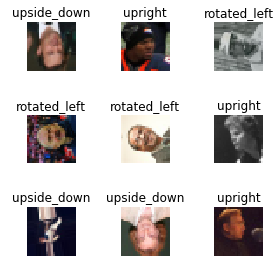

In [52]:
img_data.show_batch(rows=3, figsize=(4,4))

I have found a [Neural Netowork object](https://docs.fast.ai/tutorial.data.html) that runs with ImageDataBunch. I will use it.

In [54]:
learn = cnn_learner(img_data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1,1e-2)
learn.save('mini_train')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 40227421.01it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.411791,0.291692,0.892423,05:18


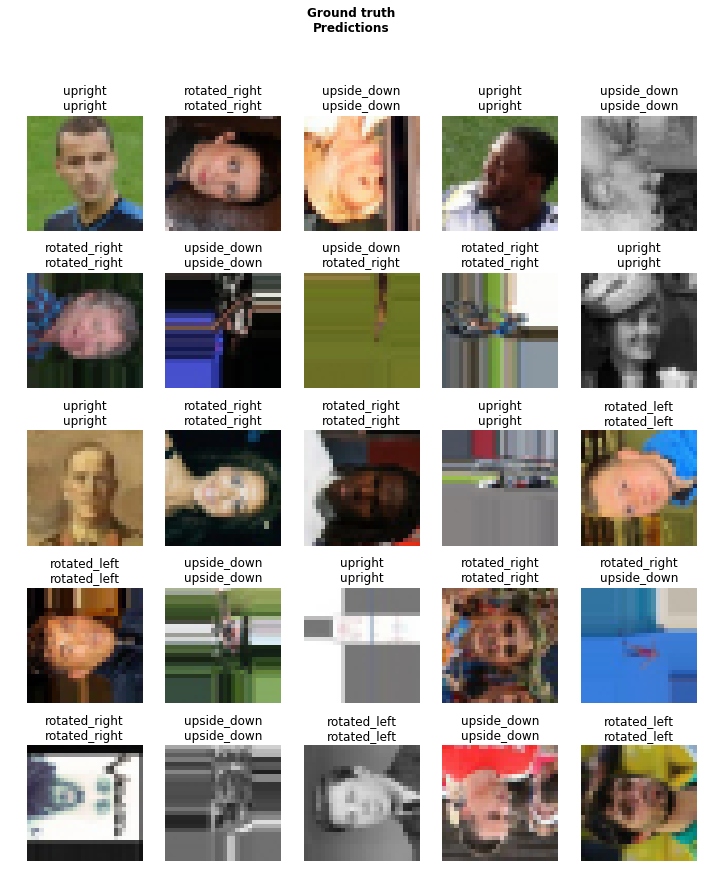

In [58]:
learn.show_results(rows=5, figsize=(12,14))